In [5]:
# Dataframe/numerical libraries'
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Tensorflow libraries
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

sns.set_theme(color_codes=True)

Importing Dataset

In [2]:
# Importing the training and test values
train = pd.read_csv(r"C:\Users\Murillo\Desktop\Python\Portfolio\Digit Recognizer\train.csv")
test = pd.read_csv(r"C:\Users\Murillo\Desktop\Python\Portfolio\Digit Recognizer\test.csv")

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking null values

In [42]:
train.isnull().any().any()

False

In [43]:
test.isnull().any().any()

False

Splitting train values

In [3]:
# Splitting train data into features and target
X_train = train.drop('label', axis=1)
y_train = train.label

# Scaling the datas
X_train = X_train/255.0
X_test = test/255.0

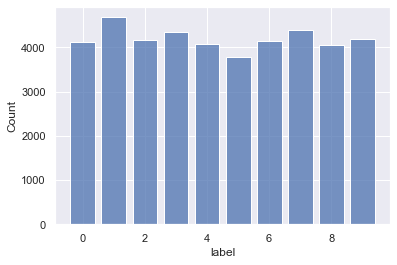

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [6]:
# Count the labels values
sns.histplot(y_train, shrink=0.8, discrete=True)
plt.show();

y_train.value_counts().sort_index()

Turning into arrays

In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

Reshaping

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [9]:
X_train.shape

(42000, 28, 28, 1)

Encoding categorical label

In [10]:
y_train = to_categorical(y_train, num_classes=10)

In [11]:
y_train.shape

(42000, 10)

ValueError: num must be 1 <= num <= 9, not 10

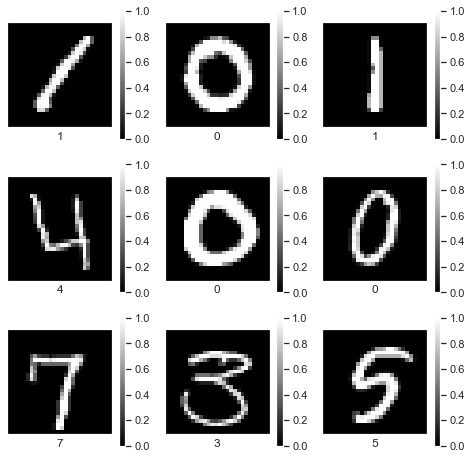

In [60]:
plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(y_train[i].argmax())
    plt.xticks([])
    plt.yticks([])
    plt.colorbar();

Model

In [18]:
model = Sequential([Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(2,2)),
                    
                    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    
                    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.25),
                    
                    Flatten(),
                    Dense(10, activation='softmax'),
                    ])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          1

Compile

In [19]:
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(),
            metrics=['accuracy'])

Fitting

In [20]:
model.fit(X_train, y_train, batch_size=32, epochs=20, shuffle=True, validation_split=0.1, verbose=2)

Epoch 1/20
1182/1182 - 55s - loss: 0.2671 - accuracy: 0.9142 - val_loss: 0.0676 - val_accuracy: 0.9798 - 55s/epoch - 47ms/step
Epoch 2/20
1182/1182 - 54s - loss: 0.0809 - accuracy: 0.9748 - val_loss: 0.0564 - val_accuracy: 0.9819 - 54s/epoch - 46ms/step
Epoch 3/20
1182/1182 - 49s - loss: 0.0593 - accuracy: 0.9822 - val_loss: 0.0351 - val_accuracy: 0.9890 - 49s/epoch - 42ms/step
Epoch 4/20
1182/1182 - 49s - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0473 - val_accuracy: 0.9843 - 49s/epoch - 42ms/step
Epoch 5/20
1182/1182 - 50s - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0282 - val_accuracy: 0.9905 - 50s/epoch - 43ms/step
Epoch 6/20
1182/1182 - 51s - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0284 - val_accuracy: 0.9912 - 51s/epoch - 44ms/step
Epoch 7/20
1182/1182 - 51s - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0299 - val_accuracy: 0.9898 - 51s/epoch - 43ms/step
Epoch 8/20
1182/1182 - 51s - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0282 - val_accuracy: 0.9907 - 51s/ep

In [64]:
model.compile(loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=0.01),
            metrics=['accuracy'])

In [65]:
model.fit(X_train, y_train, batch_size=32, epochs=20, shuffle=True, validation_split=0.1, verbose=2)

Epoch 1/20
1182/1182 - 55s - loss: 0.1251 - accuracy: 0.9692 - val_loss: 0.0781 - val_accuracy: 0.9752 - 55s/epoch - 47ms/step
Epoch 2/20
1182/1182 - 51s - loss: 0.1257 - accuracy: 0.9670 - val_loss: 0.0872 - val_accuracy: 0.9776 - 51s/epoch - 43ms/step
Epoch 3/20
1182/1182 - 51s - loss: 0.1082 - accuracy: 0.9706 - val_loss: 0.1107 - val_accuracy: 0.9724 - 51s/epoch - 43ms/step
Epoch 4/20
1182/1182 - 52s - loss: 0.1066 - accuracy: 0.9711 - val_loss: 0.0673 - val_accuracy: 0.9795 - 52s/epoch - 44ms/step
Epoch 5/20
1182/1182 - 51s - loss: 0.1133 - accuracy: 0.9716 - val_loss: 0.0809 - val_accuracy: 0.9767 - 51s/epoch - 43ms/step
Epoch 6/20
1182/1182 - 51s - loss: 0.1150 - accuracy: 0.9719 - val_loss: 0.1005 - val_accuracy: 0.9731 - 51s/epoch - 43ms/step
Epoch 7/20
1182/1182 - 45s - loss: 0.1120 - accuracy: 0.9711 - val_loss: 0.1130 - val_accuracy: 0.9767 - 45s/epoch - 38ms/step
Epoch 8/20
1182/1182 - 46s - loss: 0.1056 - accuracy: 0.9719 - val_loss: 0.0777 - val_accuracy: 0.9783 - 46s/ep

In [61]:
predictions = model.predict(X_test, batch_size=32, verbose=0)

In [62]:
np.round(predictions)

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [63]:
np.argmax(predictions)

2

In [ ]:
index_list = []
for i in enumerate(predictions):
    index_list.append(i+1)

submission = pd.DataFrame({'ImageId':index_list, 'Label':predictions})

In [ ]:
submission.to_csv('submission.csv', index=False)